In [308]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardio_train.csv


In [309]:
import numpy as np 
import pandas as pd
import category_encoders as ce
import seaborn  as sns
import matplotlib.pyplot as plt

In [335]:
df = pd.read_csv('/kaggle/input/cardio_train.csv',sep=';')
df['BMI'] = (df['weight'] * 100*100) / (df['height']**2)
m = df['cardio'].values
df.drop(['cardio','id'],axis=1,inplace=True)
df['cardio'] = m
del m
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,69301.0,19468.786280,2467.261818,10798.000000,17664.000000,19704.000000,21326.000000,23713.000000
gender,69301.0,1.349519,0.476821,1.000000,1.000000,1.000000,2.000000,2.000000
height,69301.0,164.362217,8.205337,55.000000,159.000000,165.000000,170.000000,250.000000
weight,69301.0,74.203027,14.383469,10.000000,65.000000,72.000000,82.000000,200.000000
ap_hi,69301.0,128.829584,154.775805,-150.000000,120.000000,120.000000,140.000000,16020.000000
ap_lo,69301.0,96.650092,189.096240,-70.000000,80.000000,80.000000,90.000000,11000.000000
cholesterol,69301.0,1.366806,0.680270,1.000000,1.000000,1.000000,2.000000,3.000000
gluc,69301.0,1.226447,0.572246,1.000000,1.000000,1.000000,1.000000,3.000000
smoke,69301.0,0.088051,0.283371,0.000000,0.000000,0.000000,0.000000,1.000000
alco,69301.0,0.053881,0.225784,0.000000,0.000000,0.000000,0.000000,1.000000


In [336]:
df.head() # age in days

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,BMI,cardio
0,22469,1,155,69.0,130,80,2,2,0,0,1,28.720083,0
1,14648,1,163,71.0,110,70,1,1,0,0,1,26.722873,1
2,21901,1,165,70.0,120,80,1,1,0,0,1,25.711662,0
3,14549,2,165,85.0,120,80,1,1,1,1,1,31.221304,0
4,23393,1,155,62.0,120,80,1,1,0,0,1,25.806452,0


In [348]:
df.drop_duplicates(inplace=True)

In [349]:
def ct_plot(var):
    sns.countplot(x = var,hue='cardio',data = df)
    plt.show()

In [350]:
#unique values of categorical values

print(pd.crosstab(df['cardio'],df['cholesterol']))
print(pd.crosstab(df['cardio'],df['active']))
print(pd.crosstab(df['cardio'],df['alco']))
print(pd.crosstab(df['cardio'],df['gluc']))
print(pd.crosstab(df['cardio'],df['gender']))
      
#print(df.groupby(by='gluc')['cardio'].count())
#print(df.groupby(by='cholesterol')['cardio'].count())
#print(df.groupby(by='gender')['cardio'].count())

cholesterol      1     2     3
cardio                        
0            29026  3755  1881
1            22818  5691  6106
active     0      1
cardio             
0       6305  28357
1       7275  27340
alco        0     1
cardio             
0       32737  1925
1       32806  1809
gluc        1     2     3
cardio                   
0       30573  2091  1998
1       28288  3048  3279
gender      1      2
cardio              
0       22685  11977
1       22373  12242


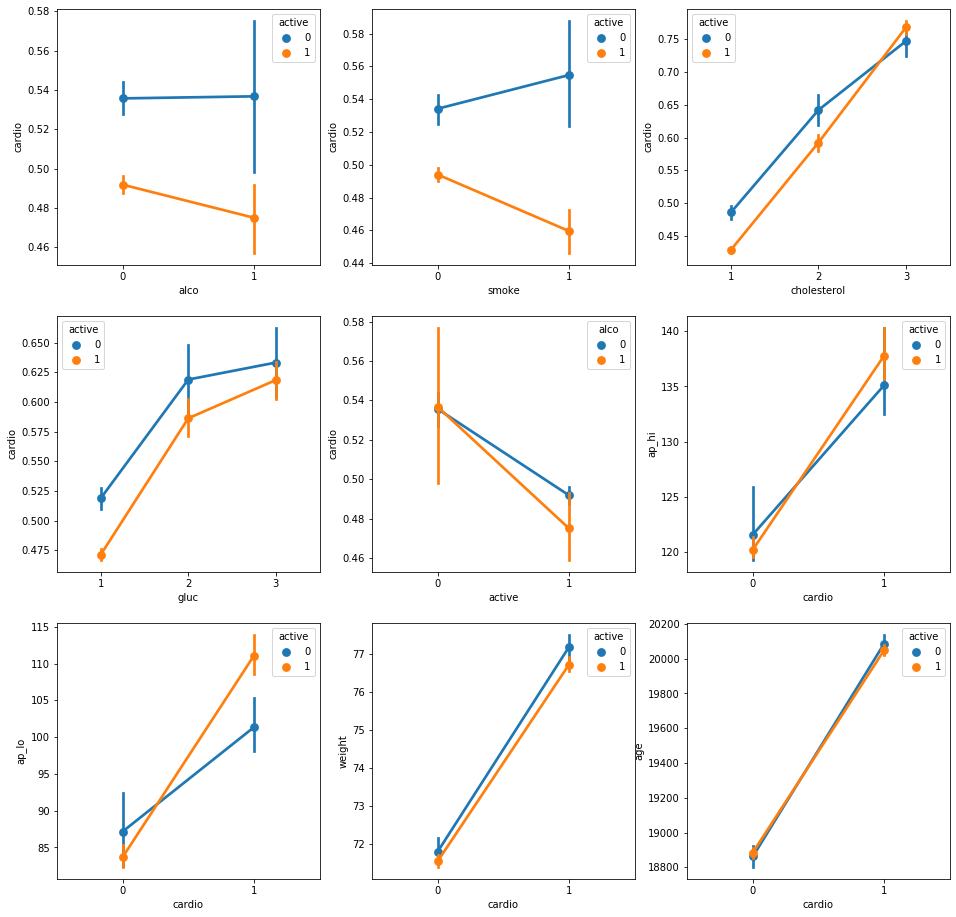

In [351]:
fig, ax = plt.subplots(nrows = 3 , ncols=3 , figsize = (16,16))
sns.pointplot(x='alco',y='cardio',hue='active',data=df,ax=ax[0][0])
sns.pointplot(x='smoke',y='cardio',hue='active',data=df,ax=ax[0][1])
sns.pointplot(y='cardio',x='cholesterol',hue='active',data=df,ax=ax[0][2])
sns.pointplot(y='cardio',x='gluc',hue ='active',data=df,ax=ax[1][0])
sns.pointplot(x='active',y='cardio',hue='alco',data=df,ax=ax[1][1])
sns.pointplot(y='ap_hi',x='cardio',hue='active',data=df , ax=ax[1][2])
sns.pointplot(y='ap_lo',x='cardio',hue='active',data=df,ax = ax[2][0])
sns.pointplot(y='weight',x='cardio',hue='active',data=df,ax = ax[2][1])
sns.pointplot(y = 'age',x='cardio',hue= 'active', data=df,ax=ax[2][2])
plt.show()

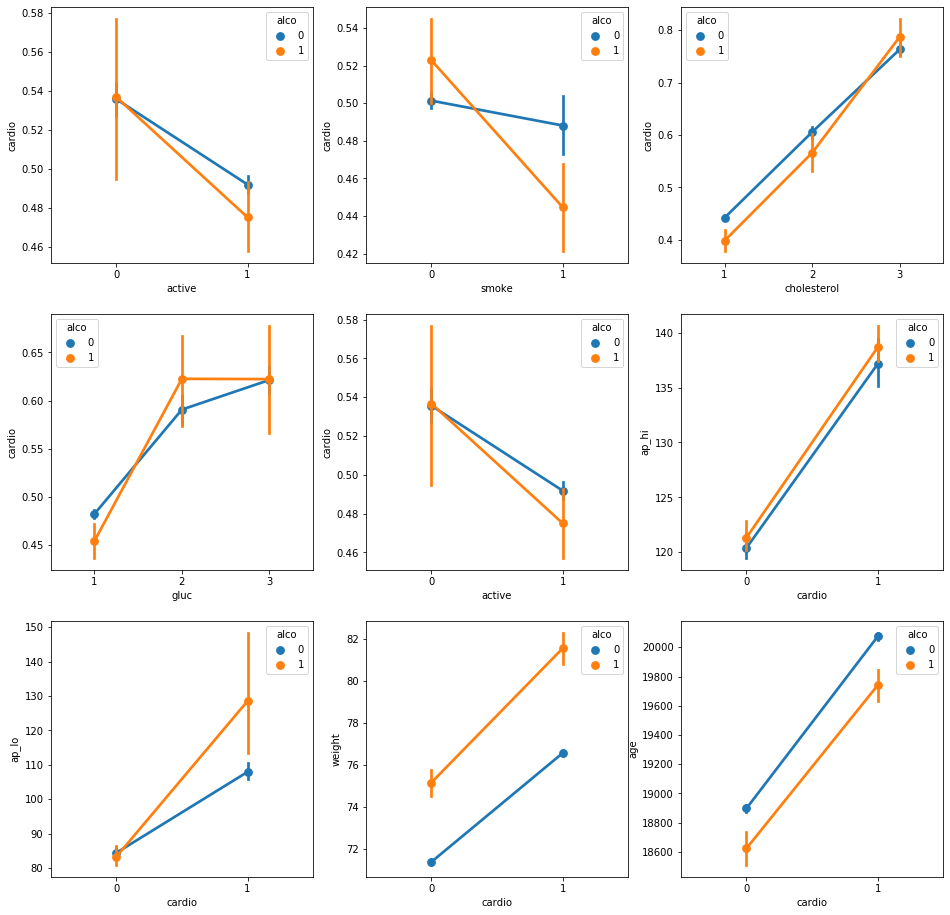

In [352]:
fig, ax = plt.subplots(nrows = 3 , ncols=3 , figsize = (16,16))
sns.pointplot(x='active',y='cardio',hue='alco',data=df,ax=ax[0][0])
sns.pointplot(x='smoke',y='cardio',hue='alco',data=df,ax=ax[0][1])
sns.pointplot(x='cholesterol',y='cardio',hue='alco',data=df,ax=ax[0][2])
sns.pointplot(y='cardio',x='gluc',hue ='alco',data=df,ax=ax[1][0])
sns.pointplot(x='active',y='cardio',hue='alco',data=df,ax=ax[1][1])
sns.pointplot(y='ap_hi',x='cardio',hue='alco',data=df , ax=ax[1][2])
sns.pointplot(y='ap_lo',x='cardio',hue='alco',data=df,ax = ax[2][0])
sns.pointplot(y='weight',x='cardio',hue='alco',data=df,ax = ax[2][1])
sns.pointplot(y = 'age',x='cardio',hue= 'alco', data=df,ax=ax[2][2])
plt.show()

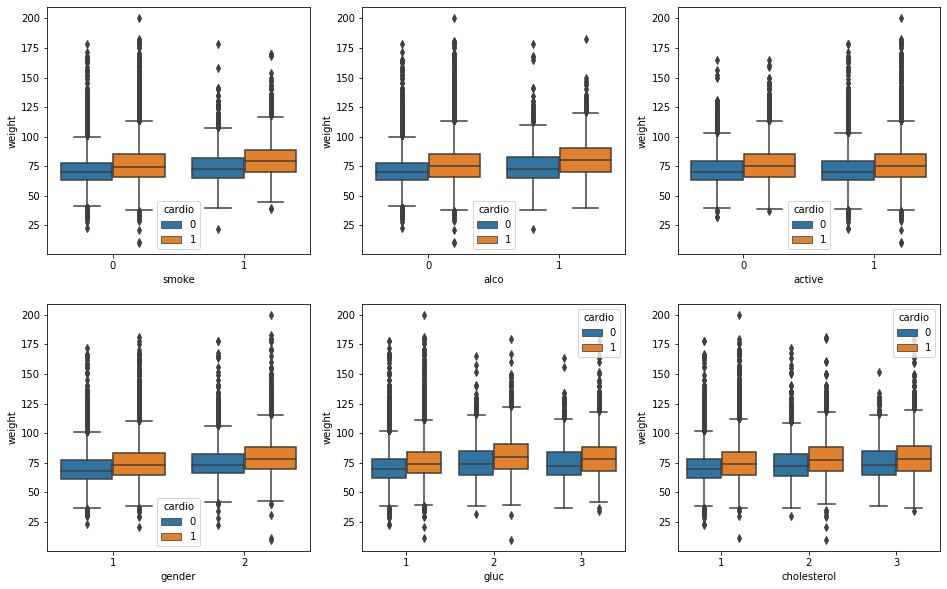

In [353]:
fig,ax = plt.subplots(nrows=2 , ncols=3 ,figsize=(16,10))

sns.boxplot(y='weight',x='smoke',hue='cardio',data=df,ax=ax[0][0])
sns.boxplot(y='weight',x='alco',hue='cardio',data=df,ax=ax[0][1])
sns.boxplot(y='weight',x='active',hue='cardio',data=df,ax=ax[0][2])
sns.boxplot(y='weight',x='gender',hue='cardio',data=df,ax=ax[1][0])
sns.boxplot(y='weight',x='gluc',hue='cardio',data=df,ax=ax[1][1])
sns.boxplot(y='weight',x='cholesterol',hue='cardio',data=df,ax=ax[1][2])
plt.show()
#sns.boxplot(x='we')

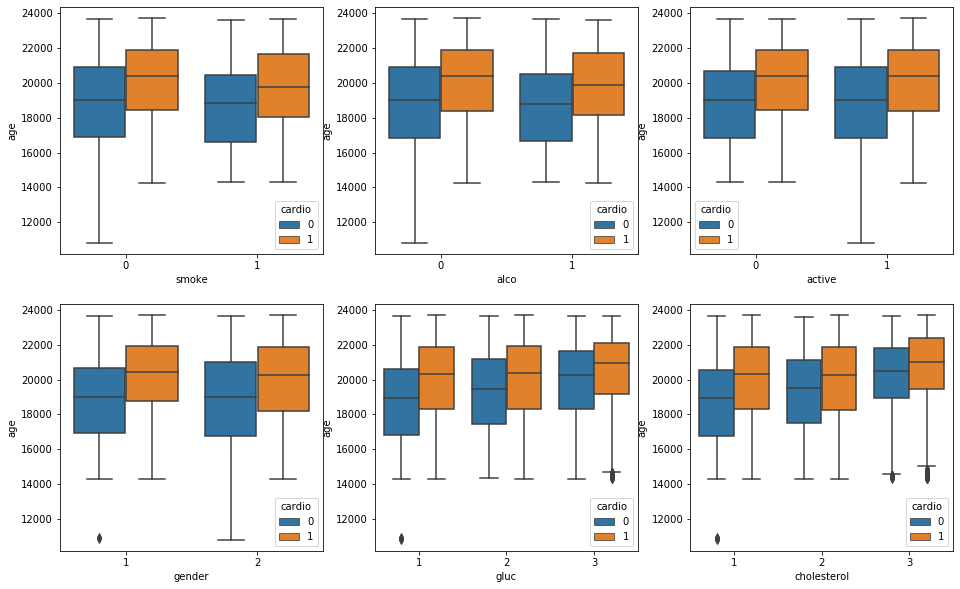

In [354]:
fig,ax = plt.subplots(nrows=2 , ncols=3 ,figsize=(16,10))

sns.boxplot(y='age',x='smoke',hue='cardio',data=df,ax=ax[0][0])
sns.boxplot(y='age',x='alco',hue='cardio',data=df,ax=ax[0][1])
sns.boxplot(y='age',x='active',hue='cardio',data=df,ax=ax[0][2])
sns.boxplot(y='age',x='gender',hue='cardio',data=df,ax=ax[1][0])
sns.boxplot(y='age',x='gluc',hue='cardio',data=df,ax=ax[1][1])
sns.boxplot(y='age',x='cholesterol',hue='cardio',data=df,ax=ax[1][2])
plt.show()

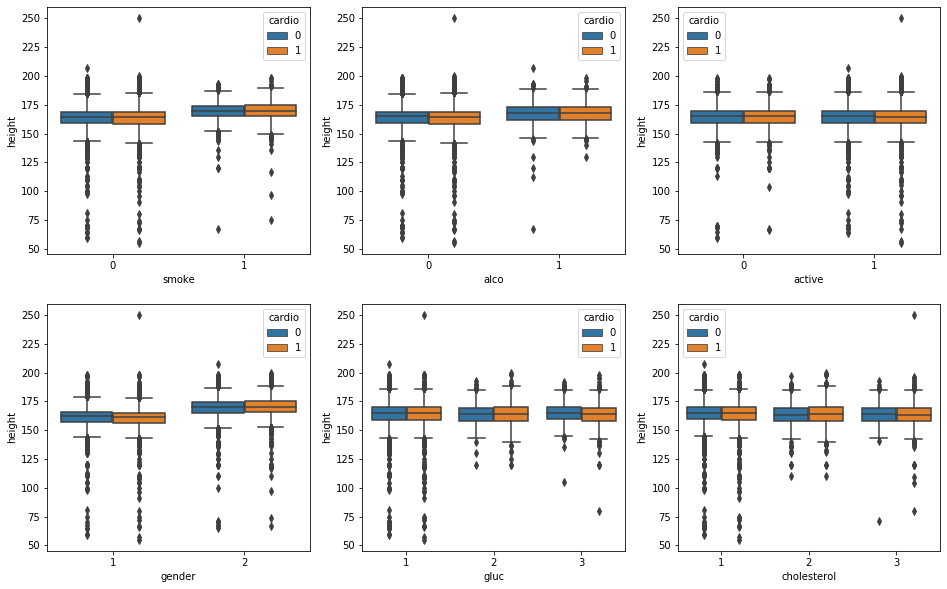

In [355]:
fig,ax = plt.subplots(nrows=2 , ncols=3 ,figsize=(16,10))

sns.boxplot(y='height',x='smoke',hue='cardio',data=df,ax=ax[0][0])
sns.boxplot(y='height',x='alco',hue='cardio',data=df,ax=ax[0][1])
sns.boxplot(y='height',x='active',hue='cardio',data=df,ax=ax[0][2])
sns.boxplot(y='height',x='gender',hue='cardio',data=df,ax=ax[1][0])
sns.boxplot(y='height',x='gluc',hue='cardio',data=df,ax=ax[1][1])
sns.boxplot(y='height',x='cholesterol',hue='cardio',data=df,ax=ax[1][2])
plt.show()

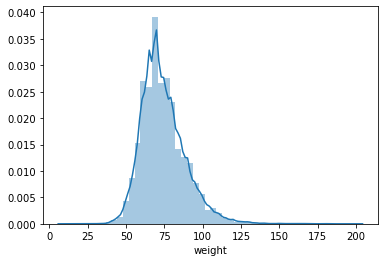

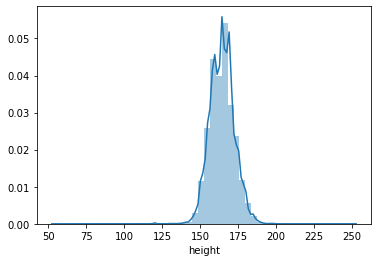

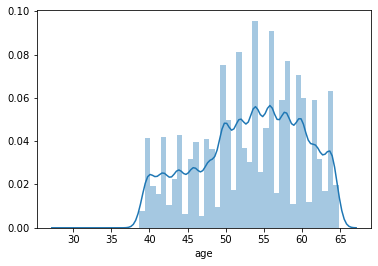

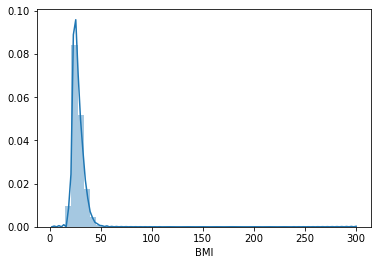

In [356]:
sns.distplot(df['weight'])
plt.show()

sns.distplot(df['height'])
plt.show()

sns.distplot(df['age']/366)
plt.show()


sns.distplot(df['BMI'])
plt.show()

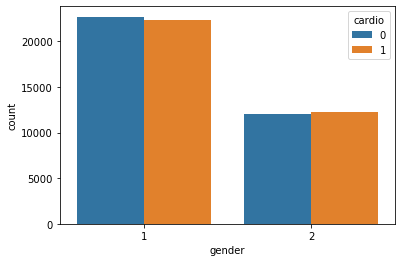

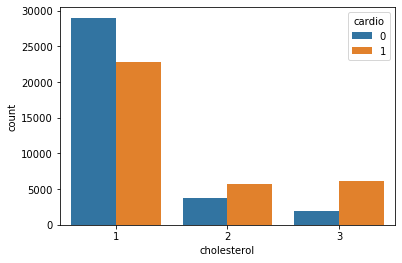

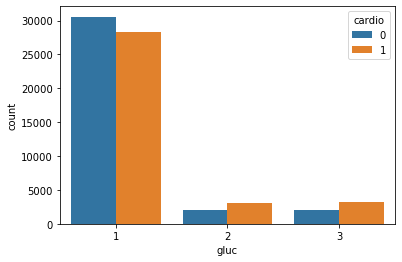

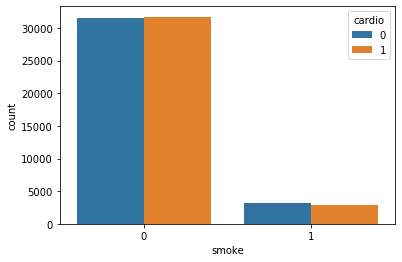

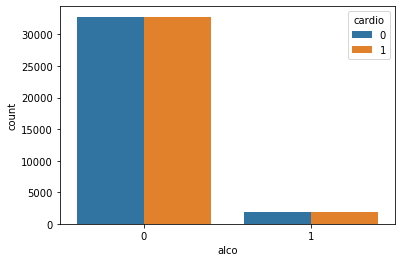

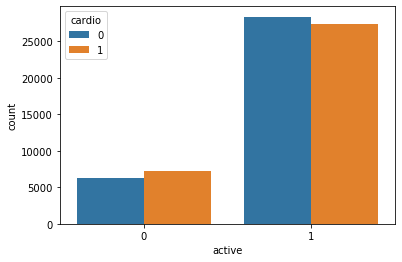

In [357]:
l = ['gender','cholesterol','gluc','smoke','alco','active']
for i in l:
    ct_plot(i)

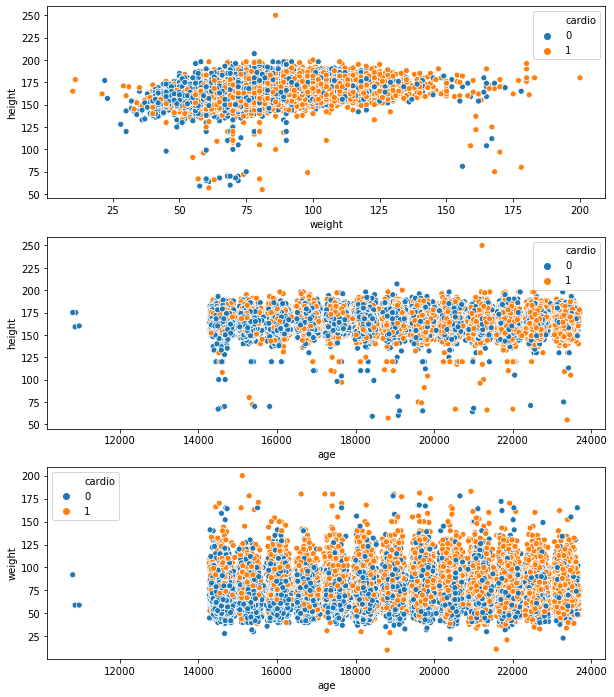

In [358]:
fig,ax = plt.subplots(nrows=3 , ncols=1 ,figsize=(10,12))
sns.scatterplot(x='weight',y='height',hue='cardio',data=df,ax=ax[0])
sns.scatterplot(x='age',y='height',hue='cardio',data=df,ax=ax[1])
sns.scatterplot(x='age',y='weight',hue='cardio',data=df,ax=ax[2])
plt.show()

In [359]:
from sklearn.preprocessing import QuantileTransformer

In [360]:
"""df_one = pd.get_dummies(df,columns=['gender','cholesterol','gluc','smoke','alco','active'],drop_first=True)
#sc = QuantileTransformer(output_distribution='normal')
sc = PowerTransformer()
l = ['age','height','weight','ap_hi','ap_lo']
for i in l:
    df_one[i] = sc.fit_transform(df_one[i].values.reshape(-1,1))
df_one.drop('cardio',axis =1,inplace=True)"""

"df_one = pd.get_dummies(df,columns=['gender','cholesterol','gluc','smoke','alco','active'],drop_first=True)\n#sc = QuantileTransformer(output_distribution='normal')\nsc = PowerTransformer()\nl = ['age','height','weight','ap_hi','ap_lo']\nfor i in l:\n    df_one[i] = sc.fit_transform(df_one[i].values.reshape(-1,1))\ndf_one.drop('cardio',axis =1,inplace=True)"

In [365]:
woe = ce.WOEEncoder(cols=['gender','cholesterol','gluc','smoke','alco','active','ap_hi','ap_lo','age'])
df_train = woe.fit_transform(df.iloc[:,:-1],df.iloc[:,-1])

sc = QuantileTransformer(output_distribution='normal')
#sc = PowerTransformer()
#sc = MinMaxScaler()
l = ['height','weight','BMI']
for i in l:
    df_train[i] = sc.fit_transform(df_train[i].values.reshape(-1,1))

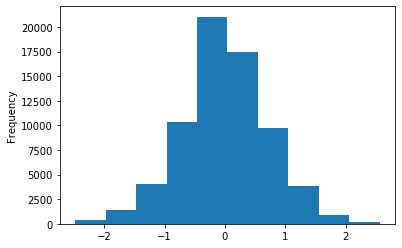

In [366]:
df_train['age'].plot.hist()

In [367]:
from sklearn.linear_model import LogisticRegression,SGDClassifier,PassiveAggressiveClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,GaussianNB
from sklearn.svm import NuSVC,SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier

In [368]:
from sklearn.model_selection import cross_val_score
clf =LogisticRegression(max_iter=2000)
"""clf2 = LinearDiscriminantAnalysis()
clf3 = QuadraticDiscriminantAnalysis()
clf4 = KNeighborsClassifier(n_neighbors=30)
clf5 = SGDClassifier(loss='hinge',alpha= 0.0001)
clf6 = BernoulliNB()
clf7 = GaussianNB()
clf13 = NuSVC(kernel='linear')
clf8 = RandomForestClassifier()"""

"clf2 = LinearDiscriminantAnalysis()\nclf3 = QuadraticDiscriminantAnalysis()\nclf4 = KNeighborsClassifier(n_neighbors=30)\nclf5 = SGDClassifier(loss='hinge',alpha= 0.0001)\nclf6 = BernoulliNB()\nclf7 = GaussianNB()\nclf13 = NuSVC(kernel='linear')\nclf8 = RandomForestClassifier()"

In [369]:
"""clf9 = AdaBoostClassifier(base_estimator=clf)
clf10 = BaggingClassifier(base_estimator=clf)
clf11 = GradientBoostingClassifier()
clf12 = XGBClassifier()
clf13 = PassiveAggressiveClassifier()"""

'clf9 = AdaBoostClassifier(base_estimator=clf)\nclf10 = BaggingClassifier(base_estimator=clf)\nclf11 = GradientBoostingClassifier()\nclf12 = XGBClassifier()\nclf13 = PassiveAggressiveClassifier()'

In [370]:
sc = cross_val_score(clf, df_train.iloc[:,:],df.iloc[:,-1] ,cv =7,n_jobs=-1)
sc.mean() ,sc.std()

(0.7556619399353706, 0.0036353148649479455)

In [371]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test = train_test_split(df_train.iloc[:,:] , df.iloc[:,-1], stratify =df.iloc[:,-1] ,test_size =0.2,random_state=42)

In [372]:
from sklearn.metrics import confusion_matrix , accuracy_score
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[5463 1470]
 [1915 5008]]
0.7557015011547344


In [373]:
#from sklearn.ensemble import StackingClassifier ,VotingClassifier
#clf = StackingClassifier(estimators=[
#    ('lda' , LogisticRegression()) , ('sgd' ,SGDClassifier())
#])

#x_train.shape,x_test.shape
#clf14.fit(df_train.iloc[:,:] , df.iloc[:,-1])
#clf14.score(df_train.iloc[:,:] , df.iloc[:,-1])"""

In [374]:
from sklearn.metrics import plot_roc_curve,classification_report,roc_auc_score
print(roc_auc_score(y_test,clf.predict_proba(x_test)[:,1]))

0.8280175082862717


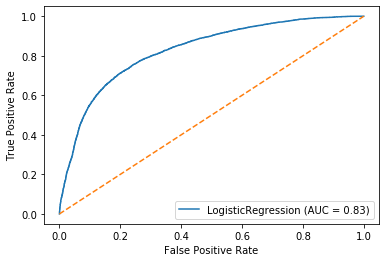

In [375]:
plot_roc_curve(clf,x_test,y_test)
plt.plot([0,1],[0,1],linestyle='--')